In [1]:
#Data Manip
import pandas as pd 

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import plotly
import plotly.graph_objs as go
import chart_studio.plotly as py
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 8)

#Interactive Plotting (Plotly)
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
from plotly.offline import iplot
InteractiveShell.ast_node_interactivity = 'all'

#Math / Stats
import numpy as np
from scipy import stats

#Normalizations
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('features.csv')
df_feat = pd.DataFrame(data)

In [3]:
#Shape of data before any processing, columns, types

print('Dataset size:', df_feat.shape)
print('Columns are:', df_feat.columns)
print('Column types are:', df_feat.dtypes)

Dataset size: (187239, 14)
Columns are: Index(['label', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13'],
      dtype='object')
Column types are: label           int64
feature_1       int64
feature_2      object
feature_3     float64
feature_4     float64
feature_5       int64
feature_6     float64
feature_7      object
feature_8     float64
feature_9      object
feature_10      int64
feature_11     object
feature_12    float64
feature_13    float64
dtype: object


In [4]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187239 entries, 0 to 187238
Data columns (total 14 columns):
label         187239 non-null int64
feature_1     187239 non-null int64
feature_2     187239 non-null object
feature_3     20787 non-null float64
feature_4     128888 non-null float64
feature_5     187239 non-null int64
feature_6     148114 non-null float64
feature_7     187239 non-null object
feature_8     184000 non-null float64
feature_9     157368 non-null object
feature_10    187239 non-null int64
feature_11    154193 non-null object
feature_12    163232 non-null float64
feature_13    184770 non-null float64
dtypes: float64(6), int64(4), object(4)
memory usage: 20.0+ MB


In [5]:
df_feat.describe()

label      feature_1  feature_3      feature_4      feature_5  \
count  187239.000000  187239.000000    20787.0  128888.000000  187239.000000   
mean        0.504494       0.206276        1.0       2.395809     597.601616   
std         0.499981       0.754156        0.0       0.986957     103.792273   
min         0.000000       0.000000        1.0       1.000000       0.000000   
25%         0.000000       0.000000        1.0       2.000000     511.000000   
50%         1.000000       0.000000        1.0       2.000000     556.000000   
75%         1.000000       0.000000        1.0       3.000000     641.000000   
max         1.000000       4.000000        1.0       4.000000     881.000000   

       feature_6      feature_8     feature_10     feature_12     feature_13  
count   148114.0  184000.000000  187239.000000  163232.000000  184770.000000  
mean         1.0       6.474348       1.800432     231.970815       1.361812  
std          0.0       1.825297       1.317445      68.913656       0.480526  
min          1.0       1.000000       1.000000      90.000000       1.000000  
25%          1.0       5.000000       1.000000     180.000000       1.000000  
50%          1.0       7.000000       1.000000     240.000000       1.000000  
75%          1.0       8.000000       2.000000     280.000000       2.000000  
max          1.0       9.000000       9.000000     495.000000       2.000000

In [6]:
#We can find strange values here easiy

df_feat.isnull().sum()

label              0
feature_1          0
feature_2          0
feature_3     166452
feature_4      58351
feature_5          0
feature_6      39125
feature_7          0
feature_8       3239
feature_9      29871
feature_10         0
feature_11     33046
feature_12     24007
feature_13      2469
dtype: int64

### Tons of missing values here
I am going to have to go through each feature and see how to best deal with those specific nulls, this looks like the bulk of the cleaning

#### Feature 3
A quick look shows us that this column has the greatest amount of nulls, let's try and figure out why:

We can see this is essentially a binary column

The only problem is that our 1 label is the only one appearing, '0' is being represented with NaN. Let's replace NaN with '0'

In [7]:
df_feat['feature_3'].value_counts()

1.0    20787
Name: feature_3, dtype: int64

In [8]:
df_feat['feature_3'] = df_feat['feature_3'].fillna(0)
df_feat['feature_3'] = df_feat['feature_3'].astype(int)
df_feat['feature_3'].value_counts()

0    166452
1     20787
Name: feature_3, dtype: int64

#### #### Feature 5 has no nulls
However, observing the mean gives us a value of 597 and a minimum value of 0. With the vast majority of values in this much higher range the 31 instances of '0' can be assumed to be null. I will drop them. I may return to this feature during EDA and drop outliers.

In [9]:
df_feat = df_feat[df_feat['feature_5'] != 0]
df_feat['feature_5'].describe()

count    187208.000000
mean        597.700574
std         103.515566
min         500.000000
25%         511.000000
50%         556.000000
75%         641.000000
max         881.000000
Name: feature_5, dtype: float64

#### Feature 6 
Feature 6 has the same issue feature 3 did, the 0s are being entered as NaN

In [10]:
#6
df_feat['feature_6'] = df_feat['feature_6'].fillna(0)
df_feat['feature_6'] = df_feat['feature_6'].astype(int)

df_feat['feature_6'].value_counts()

1    148096
0     39112
Name: feature_6, dtype: int64

#### Feature 8
We can see feature_8 has about 3200 missing values. This represents less than 2% of the total data, it will be dropped in order not to potentially bias the model with imputation

In [11]:
#8
df_feat['feature_8'] = df_feat['feature_8'].fillna(0)
df_feat['feature_8'] = df_feat['feature_8'].astype(int)
df_feat = df_feat[df_feat['feature_8'] != 0]

#### We can see that after dropping missing values from feature_9 that a large amount of missing values from features 4, 11, 12, and 13 were also dropped

This supports the dropping of those rows even further as it is clear the data was collected poorly across all of the features in those instances

In [12]:
df_feat.isnull().sum()

label             0
feature_1         0
feature_2         0
feature_3         0
feature_4     56616
feature_5         0
feature_6         0
feature_7         0
feature_8         0
feature_9     29227
feature_10        0
feature_11    32232
feature_12    23259
feature_13     2386
dtype: int64

In [13]:
#9
df_feat['feature_9'] = df_feat['feature_9'].fillna(0)
df_feat = df_feat[df_feat['feature_9'] != 0]

In [14]:
df_feat.isnull().sum()

label             0
feature_1         0
feature_2         0
feature_3         0
feature_4     38325
feature_5         0
feature_6         0
feature_7         0
feature_8         0
feature_9         0
feature_10        0
feature_11    22301
feature_12    12176
feature_13     1598
dtype: int64

#### Feature 10
Although there are no null values, we should take a look to find anything strange

In feature_10 the values '8' and 9' appear to be substantial outliers

I am not going to drop them now however I will take note of this and come back to drop them based on standard deviation later if I feel it is necessary / relevant

In [15]:
print(df_feat['feature_10'].describe())

df_feat['feature_10'].value_counts()

count    154742.000000
mean          1.799486
std           1.315984
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           9.000000
Name: feature_10, dtype: float64


1    89591
2    41094
4    16945
7     3639
3     2917
8      331
9      225
Name: feature_10, dtype: int64

#### Feature 11
Coming close to the end of dealing with null values here

In [16]:
#11
df_feat['feature_11'] = df_feat['feature_11'].fillna(0)
df_feat = df_feat[df_feat['feature_11'] != 0]

#### Feature 12
Again, as this is a numerical feature I want to make sure there isn't anything strange going on with the values

In [17]:
print(df_feat['feature_12'].describe())


count    123667.000000
mean        240.309298
std          64.532550
min          90.000000
25%         200.000000
50%         245.000000
75%         280.000000
max         495.000000
Name: feature_12, dtype: float64


In [18]:
#12
df_feat['feature_12'] = df_feat['feature_12'].fillna(0)
df_feat['feature_12'] = df_feat['feature_12'].astype(int)
df_feat = df_feat[df_feat['feature_12'] != 0]

#### Feature 13
feature_13 is a binary column consisting of 1 and 2. It also has very few nulls. I will drop the nulls and convert the values to a typical 0 and 1

In [19]:
#13
df_feat['feature_13'] = df_feat['feature_13'].fillna(0)
df_feat = df_feat[df_feat['feature_13'] != 0]

#I want to convert this back into standard binary features '1' -> '0' and '2' -> '1'
df_feat['feature_13'] = df_feat['feature_13'].astype(int)
df_feat['feature_13'] = df_feat['feature_13'] - 1

In [20]:
df_feat = df_feat.reset_index(drop = True)
print(df_feat.isnull().sum())

df_feat.tail()

label             0
feature_1         0
feature_2         0
feature_3         0
feature_4     24213
feature_5         0
feature_6         0
feature_7         0
feature_8         0
feature_9         0
feature_10        0
feature_11        0
feature_12        0
feature_13        0
dtype: int64


label  feature_1 feature_2  feature_3  feature_4  feature_5  \
122517      0          0        E1          0        3.0        515   
122518      0          0        01          0        3.0        807   
122519      0          0        10          0        NaN        602   
122520      0          0        E5          0        3.0        501   
122521      0          0        33          0        3.0        691   

        feature_6 feature_7  feature_8 feature_9  feature_10 feature_11  \
122517          1         M          3         M           1          F   
122518          1         S          9         S           4          B   
122519          0         M          9         M           2          A   
122520          1         M          9         S           1          B   
122521          1         M          7         S           2          D   

        feature_12  feature_13  
122517         300           0  
122518         220           1  
122519         290           1  
122520         275           1  
122521         330           1

In [21]:
#Based on preliminary modeling I know I won't be needing these features

df = df_feat.drop(['feature_4', 'feature_2'], axis=1)
df.head(2)

label  feature_1  feature_3  feature_5  feature_6 feature_7  feature_8  \
0      1          0          0        505          0         M          7   
1      1          0          0        803          1         M          9   

  feature_9  feature_10 feature_11  feature_12  feature_13  
0         M           1          C         280           0  
1         M           4          B         275           0

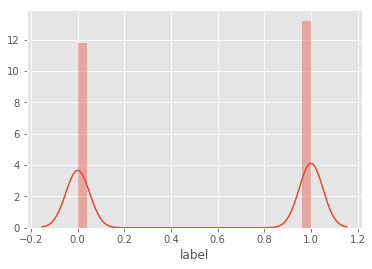

In [22]:
#What is the dist of our feature of interest?

style.use('ggplot')
sns.distplot(df['label'])
plt.show()

In [23]:
df.feature_11.value_counts()

B    47729
A    29530
C    21448
D    12813
E     6445
F     2790
G     1457
H      310
Name: feature_11, dtype: int64

In [24]:
#What about categorical features? Plotly boxplots to the rescue, we can make as many as we want

y0 = df.loc[df['feature_8'] == 3]['feature_5']
y1 = df.loc[df['feature_8'] == 4]['feature_5']
y2 = df.loc[df['feature_8'] == 5]['feature_5']
y3 = df.loc[df['feature_8'] == 6]['feature_5']
y4 = df.loc[df['feature_8'] == 7]['feature_5']
y5 = df.loc[df['feature_8'] == 8]['feature_5']
y6 = df.loc[df['feature_8'] == 9]['feature_5']



trace0 = go.Box(
    y=y0,
    name = '3',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = '4',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = '5',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
trace3 = go.Box(
    y=y3,
    name = '6',
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)
trace4 = go.Box(
    y=y4,
    name = '7',
    marker = dict(
        color = 'rgb(3, 65, 252)',
    )
)
trace5 = go.Box(
    y=y5,
    name = '8',
    marker = dict(
        color = 'rgb(252, 3, 194)',
    )
)
trace6 = go.Box(
    y=y6,
    name = '9',
    marker = dict(
        color = 'rgb(10, 0, 100)',
    )
)
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]
layout = go.Layout(
    title = "column 5 Boxplot Based on Most popular feature_8 categories"
)

fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = "features_plots")

### We can see in the above plot 2 very important things
1) That there has been a max value set at 881 for every single category, this means the true values may actually be higher but they cannot exceed the limit, this could potentially bias our modeling

2) There has also been an artificial lower bound of 500 set as well, again possibly skewing our results. If I knew more about the data I could theoretically remove these values however they may have been placed for a specific reason so I will not.

In [25]:
y0 = df.loc[df['feature_11'] == 'A']['feature_12']
y1 = df.loc[df['feature_11'] == 'B']['feature_12']
y2 = df.loc[df['feature_11'] == 'C']['feature_12']
y3 = df.loc[df['feature_11'] == 'D']['feature_12']
y4 = df.loc[df['feature_11'] == 'E']['feature_12']
y5 = df.loc[df['feature_11'] == 'F']['feature_12']
y6 = df.loc[df['feature_11'] == 'G']['feature_12']



trace0 = go.Box(
    y=y0,
    name = '3',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = '4',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = '5',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
trace3 = go.Box(
    y=y3,
    name = '6',
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)
trace4 = go.Box(
    y=y4,
    name = '7',
    marker = dict(
        color = 'rgb(252, 152, 3)',
    )
)
trace5 = go.Box(
    y=y5,
    name = '8',
    marker = dict(
        color = 'rgb(3, 252, 44)',
    )
)
trace6 = go.Box(
    y=y6,
    name = '9',
    marker = dict(
        color = 'rgb(10, 0, 100)',
    )
)
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]
layout = go.Layout(
    title = "column 12 Boxplot Based on Most popular feature_1 categories"
)

fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = "featuress_plots")

### Looks like some, lets try dropping some

In [26]:
z = np.abs(stats.zscore(df.feature_12))
# get indices of outliers
outliers= list(np.where(z > 3)[0])
# drop them
df2 = df.drop(outliers)
df2 = df2.reset_index(drop=True)

In [27]:
df2.tail()

label  feature_1  feature_3  feature_5  feature_6 feature_7  \
122218      0          0          0        515          1         M   
122219      0          0          0        807          1         S   
122220      0          0          0        602          0         M   
122221      0          0          0        501          1         M   
122222      0          0          0        691          1         M   

        feature_8 feature_9  feature_10 feature_11  feature_12  feature_13  
122218          3         M           1          F         300           0  
122219          9         S           4          B         220           1  
122220          9         M           2          A         290           1  
122221          9         S           1          B         275           1  
122222          7         S           2          D         330           1

### We dropped about 300 rows from our 125k dataset
That is a very reasonable amount! Let's see how that affects things

In [28]:
df2.feature_12.describe()

count    122223.000000
mean        239.917732
std          63.716581
min          90.000000
25%         200.000000
50%         245.000000
75%         280.000000
max         430.000000
Name: feature_12, dtype: float64

In [29]:
y0 = df2.loc[df2['feature_11'] == 'A']['feature_12']
y1 = df2.loc[df2['feature_11'] == 'B']['feature_12']
y2 = df2.loc[df2['feature_11'] == 'C']['feature_12']
y3 = df2.loc[df2['feature_11'] == 'D']['feature_12']
y4 = df2.loc[df2['feature_11'] == 'E']['feature_12']
y5 = df2.loc[df2['feature_11'] == 'F']['feature_12']
y6 = df2.loc[df2['feature_11'] == 'G']['feature_12']



trace0 = go.Box(
    y=y0,
    name = '3',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = '4',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = '5',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
trace3 = go.Box(
    y=y3,
    name = '6',
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)
trace4 = go.Box(
    y=y4,
    name = '7',
    marker = dict(
        color = 'rgb(252, 152, 3)',
    )
)
trace5 = go.Box(
    y=y5,
    name = '8',
    marker = dict(
        color = 'rgb(3, 252, 44)',
    )
)
trace6 = go.Box(
    y=y6,
    name = '9',
    marker = dict(
        color = 'rgb(10, 0, 100)',
    )
)
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]
layout = go.Layout(
    title = "column 12 Boxplot Based on Most popular feature_1 categories"
)

fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = "featuresss_plots")

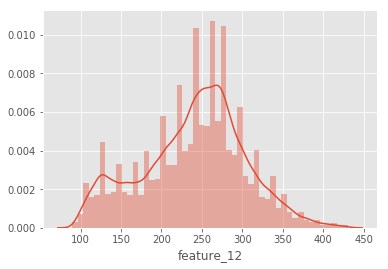

In [30]:
sns.distplot(df2['feature_12'])


### WE CAN SEE THINGS
This is trending towards a normal distribution, a great sign

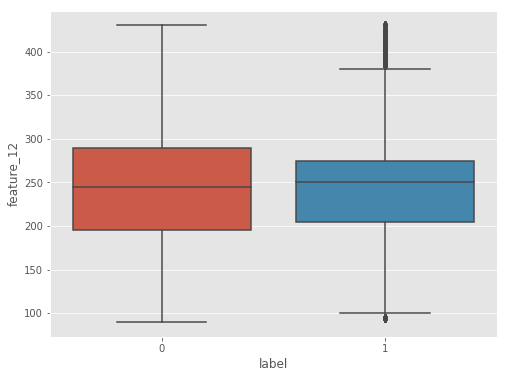

In [31]:
#try plotting again (a bit simpler this time)

var = 'label'
data = pd.concat([df2['feature_12'], df2[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y='feature_12', data=data)

In [32]:
y0 = df2.loc[df2['label'] == 0]['feature_5']
y1 = df2.loc[df2['label'] == 1]['feature_5']

trace0 = go.Box(
    y=y0,
    name = '0',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = '1',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)


data = [trace0, trace1]
layout = go.Layout(
    title = "Feature_5 Boxplot Based on Label"
)

fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = "5 Label")

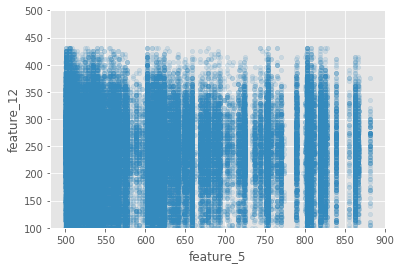

In [33]:
var = 'feature_5'
df_1 = pd.concat([df2['feature_12'], df2[var]], axis=1)
df_1.plot.scatter(x=var, y='feature_12', ylim=(100, 500), alpha=.15)


### Based on the above plot we can see the highest density between 500-550
What is also something that might be of interest is we get spikes of density every 50th interval

### We used our gut but lets find features we wouldn't have thought of
We can do this with a heatmap, it will allow us to find our correlated features at a glance

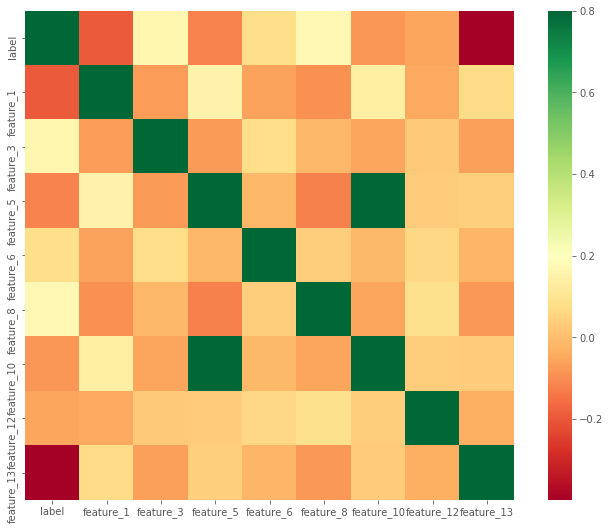

In [34]:
#Correlation Matrix
style.use('ggplot')
corrmat = df2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap="RdYlGn")
plt.show()

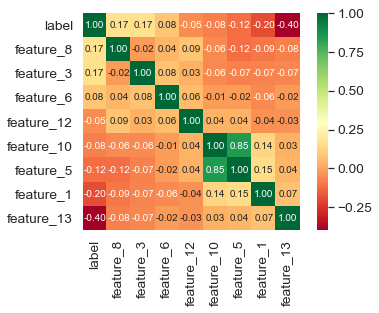

In [35]:
#Let's look at top 9 most correlated to our feature of interest

k = 10
cols = corrmat.nlargest(k, 'label')['label'].index
cm = np.corrcoef(df2[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, cmap="RdYlGn", fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

plt.show()

### We see our top 10 most correlated features to our interest
Remember, some of these features may be very correlated with each other thus providing us with redundant information. From there we can choose to include just 1 of those features in our model as this will improve performance while saving relevant information. These may not be the most important features for modeling however, we need to be careful to not assume. When running a Random Forest for example we can use the feature importance function to see which features pertained most to that RandomForest model. We can then return back to our data and engineer it accordingly. These heatmaps give us a good baseline to work/think with!

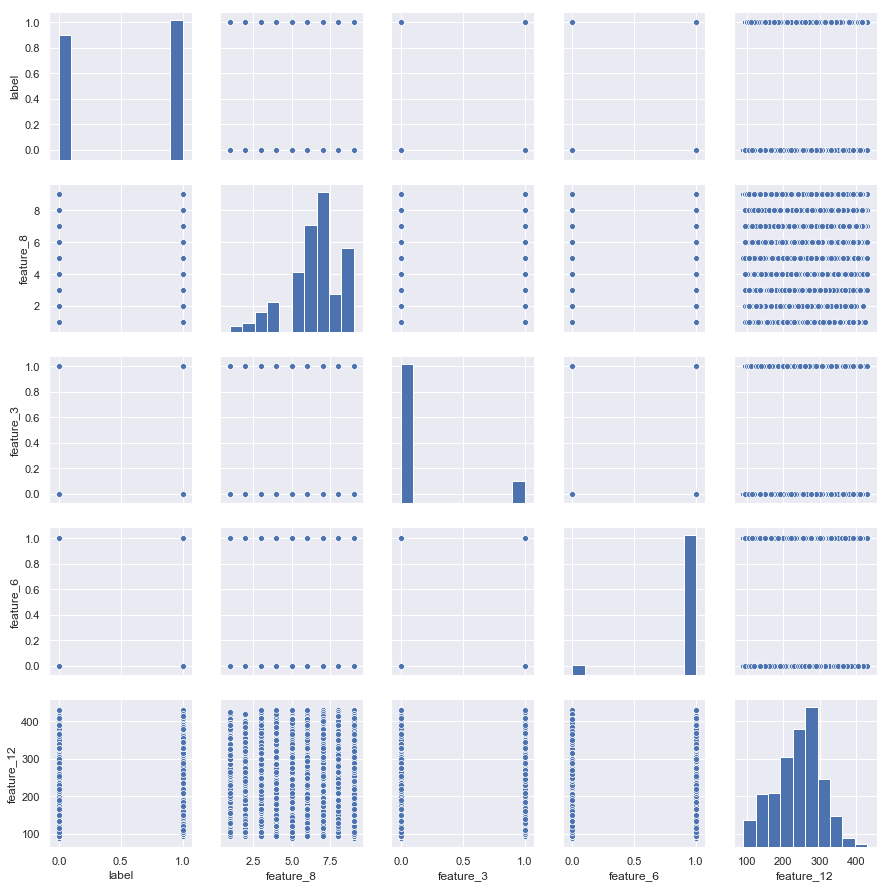

In [36]:
#Let's plot everything that looks relevant

sns.set()
cols = ['label', 'feature_8', 'feature_3', 'feature_6', 'feature_12']
sns.pairplot(df2[cols], size = 2.5)

plt.show()

### We can see our relationships here
What is linear, exponential, no relationship, etc

In [37]:
#Our new shape

df2.shape

(122223, 12)

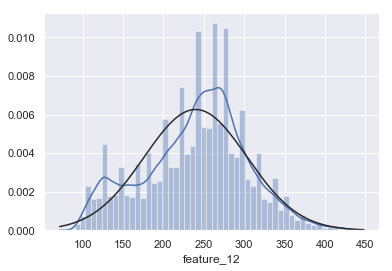

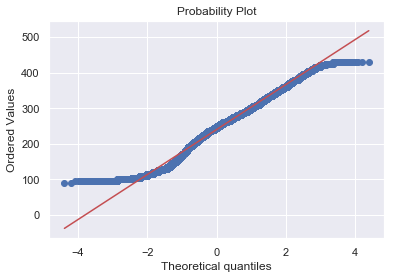

In [38]:
#histogram and normal probability plot

sns.distplot(df2['feature_12'], fit=norm);
fig = plt.figure()
res = stats.probplot(df2['feature_12'], plot=plt)

### What does our distribution look like?
We can always apply a log function on it to make the distribution more normal

In [39]:
#Apply our log function

df2['feature_12_log'] = np.log(df2['feature_12'])

#Log could give us inf values, this sets those to 0
df2['feature_12_log'][np.isneginf(df2['feature_12_log'])] = 0


In [40]:
df2['feature_12_log'].describe()

count    122223.000000
mean          5.439792
std           0.296952
min           4.499810
25%           5.298317
50%           5.501258
75%           5.634790
max           6.063785
Name: feature_12, dtype: float64

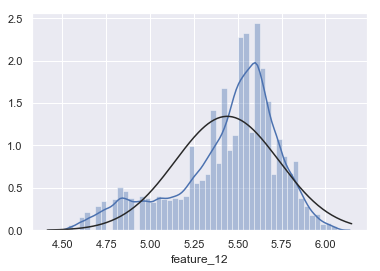

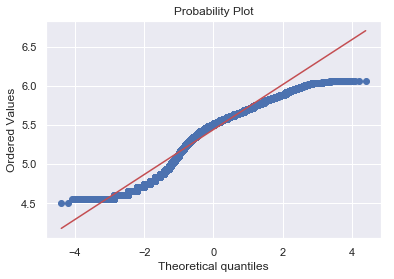

In [41]:
#New transformed plots

sns.distplot(df2['feature_12_log'], fit=norm);
fig = plt.figure()
res = stats.probplot(df2['feature_12_log'], plot=plt)

In [42]:
df2.head()

label  feature_1  feature_3  feature_5  feature_6 feature_7  feature_8  \
0      1          0          0        505          0         M          7   
1      1          0          0        803          1         M          9   
2      1          0          0        623          1         M          9   
3      1          0          0        505          1         M          6   
4      1          0          0        508          1         M          6   

  feature_9  feature_10 feature_11  feature_12  feature_13  
0         M           1          C    5.634790           0  
1         M           4          B    5.616771           0  
2         M           2          A    5.634790           1  
3         M           1          B    5.616771           0  
4         M           1          B    5.323010           0